In [0]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

KeyboardInterrupt: ignored

In [0]:
fruits = pd.read_table("/content/drive/My Drive/MOOC_MarchineLearning/Data/fruit_data_with_colors.csv")

In [0]:
X = fruits[['mass','width','height','color_score']]
y = fruits['fruit_label']
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)

In [0]:
X_train.shape
X.shape

(59, 4)

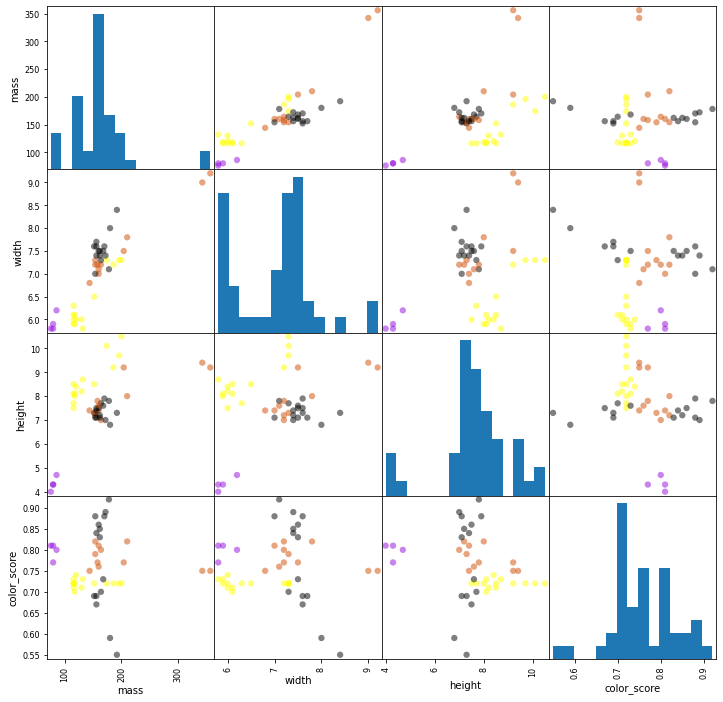

In [0]:
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap=cmap)


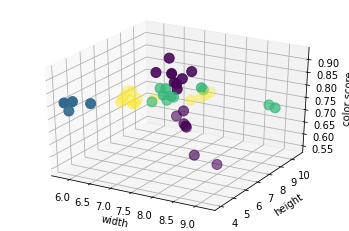

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color score')
plt.show()

In [0]:
import plotly.express as px

fig = px.scatter_3d(X_train, x='width', y='height', z='color_score',
              color=y_train)
fig.show()

In [0]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))

In [0]:
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [0]:
X = fruits[['mass','width','height']]
y = fruits['fruit_label']
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)

In [0]:
X_train.shape

(44, 3)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [0]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
knn.score(X_test, y_test)

0.5333333333333333

In [0]:
X_train.shape

(44, 3)

In [0]:
fruit_forecast = knn.predict([[20,4.3,5.5]])

In [0]:
plot_module = drive.CreateFile({'id':'https://drive.google.com/open?id=1UV_sxB1np5AgJEqMklXziKEIKwda90eX'})


In [1]:
import sys
sys.path.append("/content/drive/My Drive/MOOC_MarchineLearning/")
import imp
import adspy_shared_utilities as  plot_func
imp.reload(plot_func)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<module 'adspy_shared_utilities' from '/content/drive/My Drive/MOOC_MarchineLearning/adspy_shared_utilities.py'>

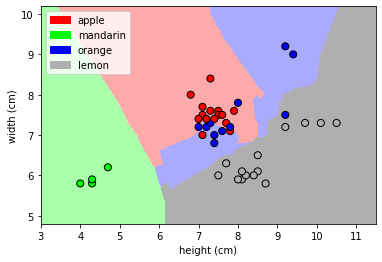

In [0]:
plot_func.plot_fruit_knn(X_train,y_train, 5, 'uniform')

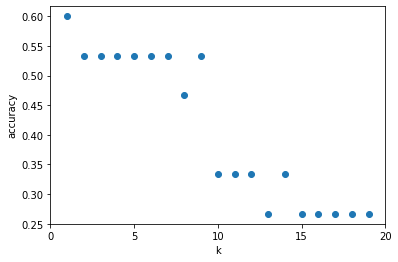

In [0]:
k_range = range(1,20)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);